Using Velocity and Cellrank with Streams
========================================

This example shows how MIRA's lineage inference, plotting, and tracing capabilities can be combined with [CellRank](https://cellrank.readthedocs.io/en/stable/index.html), which offers a generalized version of the stochastic markov chain model of differentiation that can utilize velocity information. CellRank also provides more advanced and scalable methods for terminal/initial state selection and terminal lineage probability calculations. 

This tutorial begins by following the basic CellRank velocity tutorial. After computing absoption probabilities for each cell, we can then use MIRA to parse those probabilities into bifurcating lineages.

[Click here](#Lineage-parsing-with-MIRA) to skip to lineage parsing and visualization with MIRA. Otherwise,

## ScVelo/CellRank workflow

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import mira
import matplotlib.pyplot as plt

scv.settings.verbosity = 3
cr.settings.verbosity = 2

import warnings
warnings.simplefilter("ignore")
mira.utils.pretty_sderr()

In [2]:
adata = scv.datasets.pancreas()

scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


recovering dynamics (using 8/12 cores)


  0%|          | 0/1295 [00:00<?, ?gene/s]

    finished (0:02:56) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


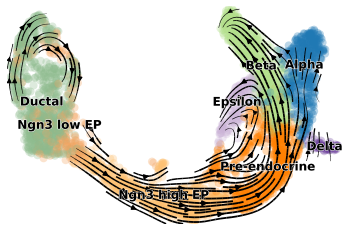

In [3]:
scv.tl.recover_dynamics(adata, n_jobs=8)

scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:06)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999922e-01 8.0734852408665247e-03 -1.3939720968571084e-02 1.6711722091868716e-02 -2.6729757323936221e-02 
0.0000000000000000e+00 9.8776010871620534e-01 -1.0924894189798409e-02 3.0945357751443709e-02 2.8694207884616341e-02 
0.0000000000000000e+00 0.0000000000000000e+00 9.8597300904777974e-01 1.2846676832100178e-02 -2.4631237672415930e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.5327128881414147e-01 -1.1276550785823255e-02 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.2593561028091487e-01 
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:01)
Computing `5` macrostates


INFO:root:Using pre-computed Schur decomposition


Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


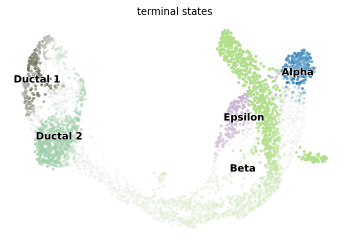

In [4]:
cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0,
                     n_states=5, force_recompute=True)
cr.pl.terminal_states(adata)

Accessing `adata.obsp['T_bwd']`
Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:11)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
For 1 macrostate, stationary distribution is computed
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


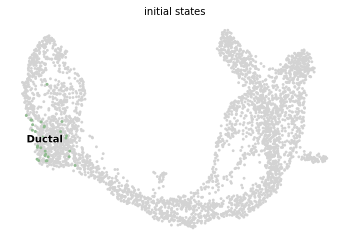

In [5]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------


Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:07)
Using a connectivity kernel with weight `0.5`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing absorption probabilities


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  


  0%|          | 0/5 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


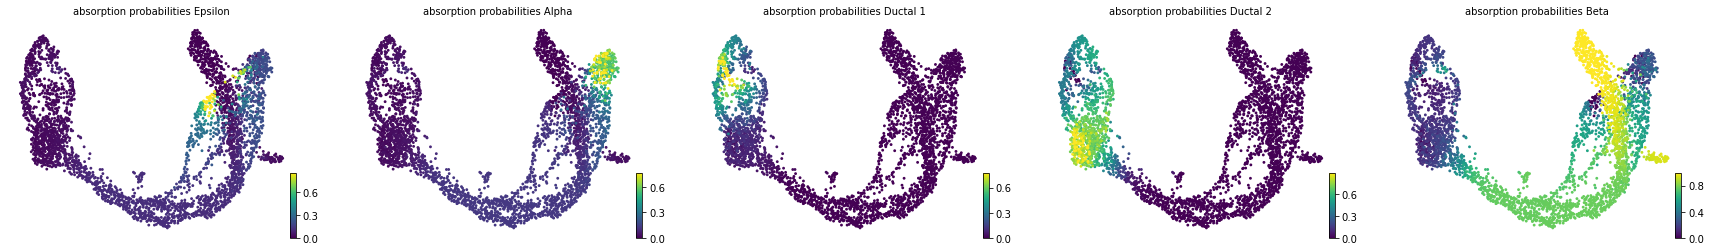

In [6]:
cr.tl.transition_matrix(adata, weight_connectivities=0.5)
cr.tl.lineages(adata,)
cr.pl.lineages(adata, same_plot=False)

In [7]:
scv.tl.velocity_pseudotime(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


## Lineage parsing with MIRA

CellRank is essentially a generalization of [Palantir](https://github.com/dpeerlab/Palantir) that can be used with pseudotime and velocity data. Since MIRA's core pseudotime trajectory inference functionalities are derived from Palantir, that means MIRA can easily be extended to analyze velocity data!

The cellrank function above computes absorption probabilities for each cell - the probability of diffusing through the markov chain model of the differentiation to each terminal state. MIRA can parse these probabilities to find the bifurcating structure of the data. 

In this case, cellrank did not identify the **Delta** cells as a terminal lineage based on velocity data, so they did not form a branch on the tree. 

A notable difference between the annotated clusters (left) and the tree parsing (right) is the tree parsing identified a group of cells, "Epsilon, Alpha", in orange, that has still not yet committed to either of these fates, as per the velocity vectors.

INFO:mira.adata_interface.pseudotime:Added key to obs: tree_states
INFO:mira.adata_interface.pseudotime:Added key to uns: tree_state_names
INFO:mira.adata_interface.pseudotime:Added key to uns: connectivities_tree
... storing 'tree_states' as categorical


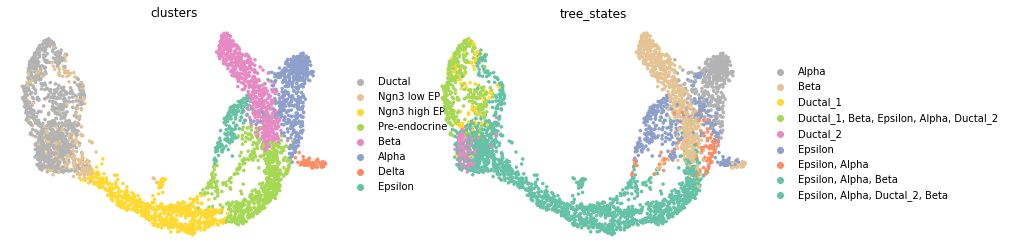

In [8]:
mira.time.get_tree_structure(adata, threshold = 0.712, start_cell = int(adata.obs.initial_states_probs.argmax()),
            pseudotime_key = 'velocity_pseudotime', cellrank = True)

sc.pl.umap(adata, color = ['clusters','tree_states'], palette = 'Set2_r', frameon = False,
          add_outline=False, outline_width=(0.1, 0), outline_color=('lightgrey','white'), size = 50)

Finding the tree structure of the data enables us to explore regulatory dynamics using MIRA's streamgraphs. Below, we show the expression of marker genes representing transitions in cell identity. 

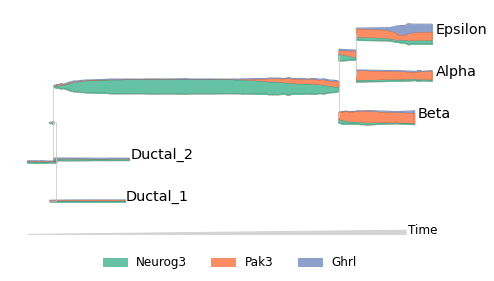

In [9]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime',
                   data = ['Pak3','Neurog3','Ghrl'], log_pseudotime=False, palette = 'Set2',
                   scale_features=True, figsize=(7,4), max_bar_height=0.99, clip = 1, min_pseudotime = 0.2)
plt.show()

MIRA swarmgraph is useful for plotting discrete values, such as cluster labels. The tree structure of the data largely recapitulates the cluster annotations.

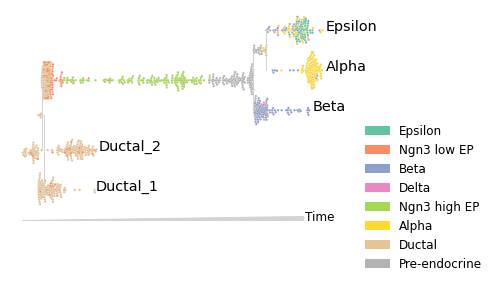

In [10]:
adata.obs.clusters = adata.obs.clusters.astype(str)
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', style = 'swarm', max_swarm_density=500,
                   data = 'clusters', log_pseudotime=False, palette = 'Set2', size = 5, max_bar_height=0.9,
                   scale_features=True, figsize=(7,4), min_pseudotime = 0.2, linecolor = 'lightgrey')
plt.show()

Streams may also demonstrate RNA velocity. This streagraph shows relative frequencies of unspliced vs. spliced transcripts for gene *Cpe*: 

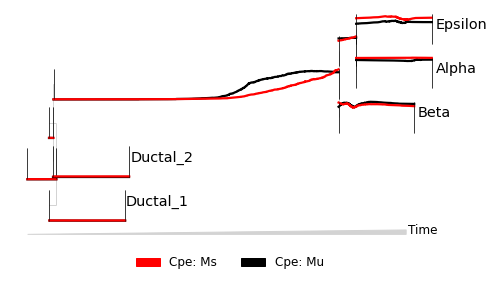

In [11]:
mira.pl.plot_stream(adata, pseudotime_key='velocity_pseudotime', layers=['Ms','Mu'], style = 'line', size = 5,
                   data = ['Cpe','Cpe'], log_pseudotime=False, palette = ['red','black'], window_size=101,
                   scale_features=True, figsize=(7,4), max_bar_height=0.7, clip = 1, min_pseudotime = 0.2)
plt.show()

Finally, RNA velocity may be combined with MIRA's `trace_differentiation` functionality to study routes through which cells diffuse through the differentiation manifold. 

In [12]:
cr.tl.transition_matrix(adata, weight_connectivities=0) # only use velocity transitions

Computing transition matrix based on logits using `'deterministic'` mode


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/3696 [00:00<?, ?cell/s]

Setting `softmax_scale=5.3689`


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------


    Finish (0:00:05)


<VelocityKernel>

Traces can be used to find ancestral cell populations starting from lineage termini. RNA velocity indicates **Epsilon** cells follow a less direct path through the differentiation manifold than one might expect:

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


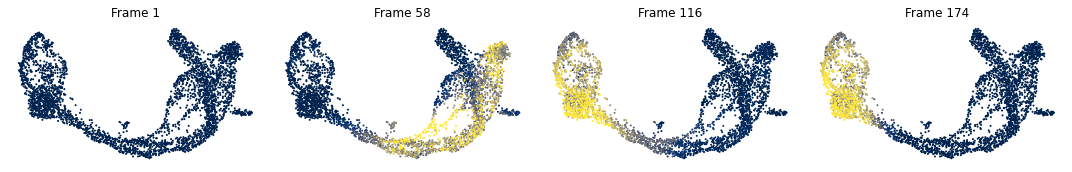

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


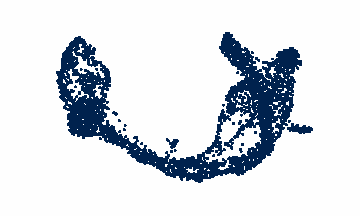

In [13]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Epsilon').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=175, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

mira.utils.show_gif('data/velocity_test.gif')

And some **Beta** cells appear to descend from **Alpha**-like cells, branching later in the differentiation:

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


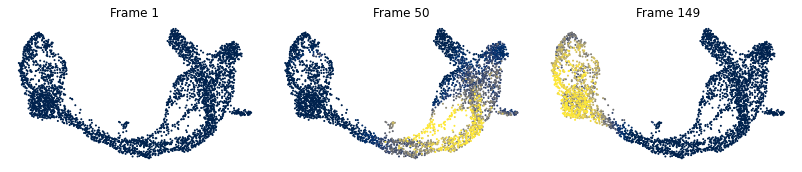

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


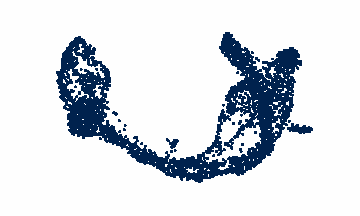

In [14]:
mira.time.trace_differentiation(adata, start_cells= (adata.obs.terminal_states == 'Beta').values,
                               direction='forward', transport_map_key='T_bwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=150, steps_per_frame=1, sqrt_time=True, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=24, add_outline = False,
                               num_preview_frames=3)

mira.utils.show_gif('data/velocity_test.gif')

Tracing the differentiation forward, one can see cycling states in **Ductal** cells:

INFO:mira.pseudotime.backtrace:Creating transport map ...
INFO:mira.pseudotime.backtrace:Tracing ancestral populations ...


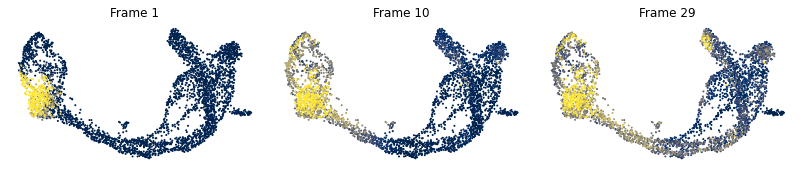

INFO:mira.pseudotime.backtrace:Creating animation ...
INFO:mira.pseudotime.backtrace:Saving animation ...
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


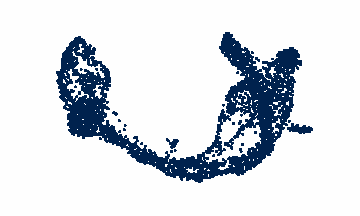

In [15]:
mira.time.trace_differentiation(adata, start_cells= [int(adata.obs.initial_states_probs.argmax())],
                               transport_map_key='T_fwd', save_name='data/velocity_test.gif',
                               log_prob = True, num_steps=30, steps_per_frame=1, sqrt_time=False, palette='cividis',
                               vmax_quantile=0.95, figsize = (5,3), size = 1, fps=8, add_outline = False,
                               num_preview_frames=3)

mira.utils.show_gif('data/velocity_test.gif')

CellRank intends to update their infrastructure with new "kernels" - essentially methods with which to assess cell-cell similarity and transition probabilities. Extension of their methods to include exciting new ideas in optimal transport mean MIRA can leverage these new methods de facto.